## Dependencies and Setup

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import sem

In [2]:
# Set path for data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read in mouse and study results data
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Merge data into single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Check for the number of unique mice
combined_unique_mice_count = len(combined_data['Mouse ID'].unique())
combined_unique_mice_count

249

In [4]:
# Find the duplicate mice by ID number that show up for mouse ID and timepoint
# Researched on stack overflow about a .duplicated function
duplicate_search = combined_data[combined_data.duplicated(subset = ['Mouse ID','Timepoint'])]
duplicate_id = duplicate_search['Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [5]:
# Find data for the duplicate mouse ID
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] == 'g989',:]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean dataframe by dropping the duplicate mouse by the ID
# I had initially done a .loc in order to filter specifically for mouse g989. However, after my tutoring session with Zach, he suggested I create a dynamic filter using the .isin function
cleaned_data = combined_data.loc[combined_data['Mouse ID'].isin(duplicate_id) == False]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Check for the number of unique mice
clean_unique_mice_count = len(cleaned_data['Mouse ID'].unique())
clean_unique_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_grouped = cleaned_data.groupby('Drug Regimen')
mean_tumor_volume = drug_regimen_grouped['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regimen_grouped['Tumor Volume (mm3)'].median()
tumor_volume_variance = drug_regimen_grouped['Tumor Volume (mm3)'].var()
tumor_volume_std = drug_regimen_grouped['Tumor Volume (mm3)'].std()
tumor_volume_SEM = drug_regimen_grouped['Tumor Volume (mm3)'].sem()

# Place the data (series) into dataframe
summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                                   'Median Tumor Volume': median_tumor_volume,
                                   'Tumor Volume Variance': tumor_volume_variance,
                                   'Tumor Volume Std. Dev.': tumor_volume_std,
                                   'Tumor Volume Std. Err.': tumor_volume_SEM
                                  })
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate the same summary statistics table using a method to produce everything with a single grouby function
# Looked up .agg on stack overflow in order to achieve this for a single grouby function

single_groupby_summary_statistics = drug_regimen_grouped.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
single_groupby_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Get a value count for the amount of trials ran for each drug
count_of_trials = cleaned_data['Drug Regimen'].value_counts()
sorted_count_of_trials = count_of_trials.sort_values(ascending = False)
sorted_count_of_trials

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

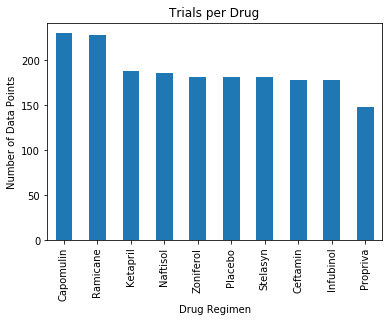

In [11]:
# Generate a bar plot showing the total number of mice for each treatment using pandas
trials_per_drug = sorted_count_of_trials.plot(kind = 'bar', figsize = (6,4))
trials_per_drug.set_title('Trials per Drug')
trials_per_drug.set_xlabel('Drug Regimen')
trials_per_drug.set_ylabel('Number of Data Points')
plt.show()